## Problem Statement: Estimate Fare Prices
Continuous Data hence Linear regression, Decision Tree regressor and Random Forest regressor will be applied as machine learning algorithms

The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately.

Linear Regression, Decision Tree Regressor, Random Forest Regressor
- https://www.kaggle.com/datasets/yasserh/uber-fares-dataset
- https://www.kaggle.com/code/muhammadannasimtiaz/uber-fare-prediction/notebook
- https://bobbyhadz.com/blog/python-no-module-named-geopandas

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import DistanceMetric
from math import radians

In [85]:
url ='https://raw.githubusercontent.com/Akii477/Uber_fare_prediction/main/uber.csv'
fare_data = pd.read_csv(url)

Read a comma-separated values (csv) file into DataFrame.

In [86]:
fare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.

In [87]:
fare_data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


The head() method returns a specified number of rows, string from the top. The head() method returns the first 5 rows if a number is not specified. Note: The column names will also be returned, in addition to the specified rows.

In [88]:
fare_data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


The describe() method returns description of the data in the DataFrame.

In [89]:
data = fare_data
data.nunique()

Unnamed: 0           200000
key                  200000
fare_amount            1244
pickup_datetime      196629
pickup_longitude      71066
pickup_latitude       83835
dropoff_longitude     76894
dropoff_latitude      90585
passenger_count           8
dtype: int64

Return the number of unique values for each column

In [90]:
# Dropping the columns 'Unnamed: 0' and 'key' as well as NA rows

data = data.drop(['Unnamed: 0','key'],axis=1) # axis 1 for columns
data.dropna(axis=0,inplace=True) # 0 to drop rows with null value

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [91]:
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


~ 2 Lakh rows

## Exploratory Data Analysis and Data Pre-Processing


In [92]:
stats = data.describe().T #returns the transposed version of the data summary
stats

,count,mean,std,min,25%,50%,75%,max
fare_amount,199999.0,11.359892,9.901760,-52.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,199999.0,-72.527631,11.437815,-1340.648410,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,199999.0,39.935881,7.720558,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,199999.0,-72.525292,13.117408,-3356.666300,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,199999.0,39.923890,6.794829,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,199999.0,1.684543,1.385995,0.000000,1.000000,1.000000,2.000000,208.000000


In Python, data.describe() and data.describe().T are two different methods used to get summary statistics of a given DataFrame or Series object.

data.describe() returns a DataFrame containing various statistics such as count, mean, standard deviation, minimum, and maximum values for each numeric column in the given DataFrame. This method returns the summary statistics in a vertical format, with columns representing the different statistics and rows representing the different numeric columns in the DataFrame.

On the other hand, data.describe().T returns a transposed version of the summary statistics DataFrame obtained from data.describe(). The .T attribute of the DataFrame object is used to transpose the rows and columns of the DataFrame, effectively converting the vertical format to a horizontal format. This method returns the same summary statistics as data.describe(), but in a horizontal format, with rows representing the different statistics and columns representing the different numeric columns in the DataFrame.

In summary, data.describe() returns the summary statistics in a vertical format, while data.describe().T returns the same summary statistics in a horizontal format.

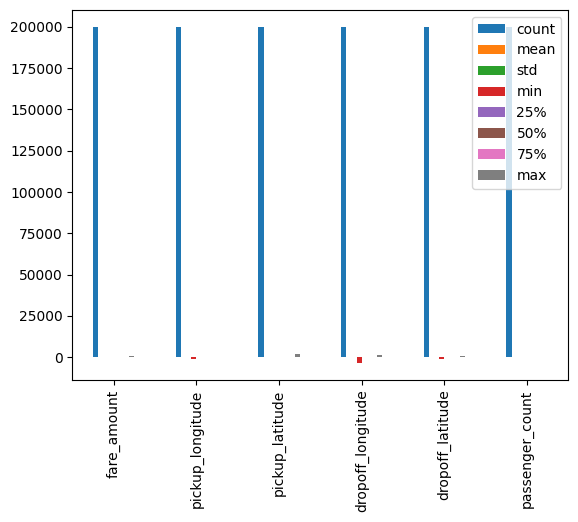

In [93]:
stats.plot(kind='bar')
plt.show()

In [94]:
stats
stats = stats.drop('count',axis=1)

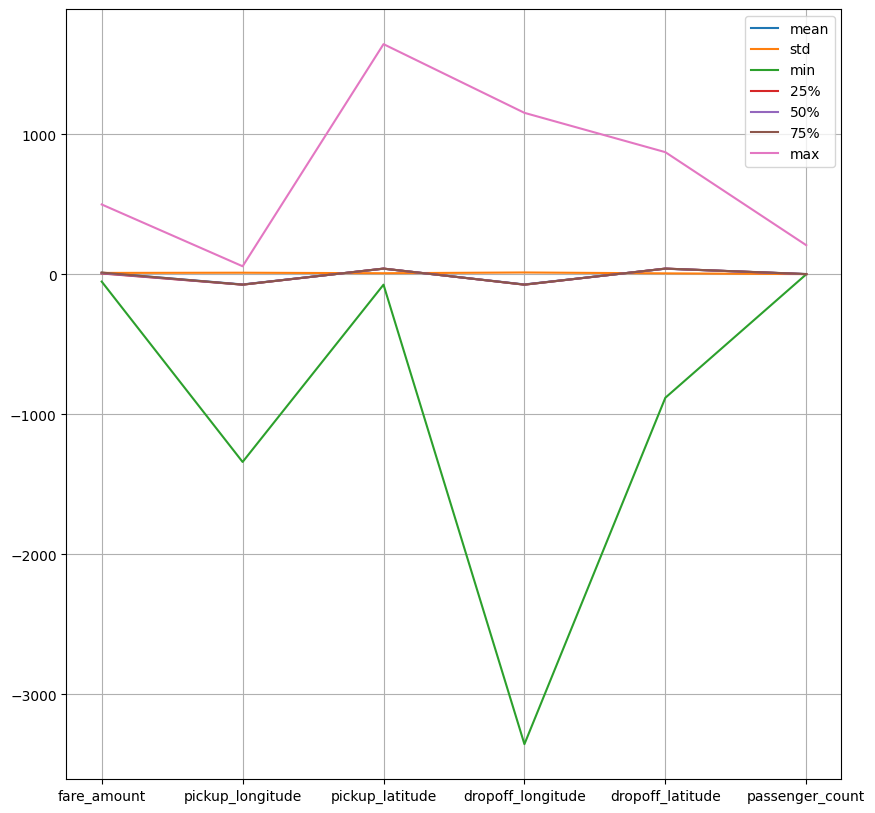

In [95]:
stats.plot(figsize=(10,10), kind='line', grid='true')
plt.show()

In [96]:
data.corr()

<ipython-input-96-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000


<ipython-input-97-acbf16fcc3e7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, vmin = -1, vmax = 1, fmt = '.2g')


<Axes: >

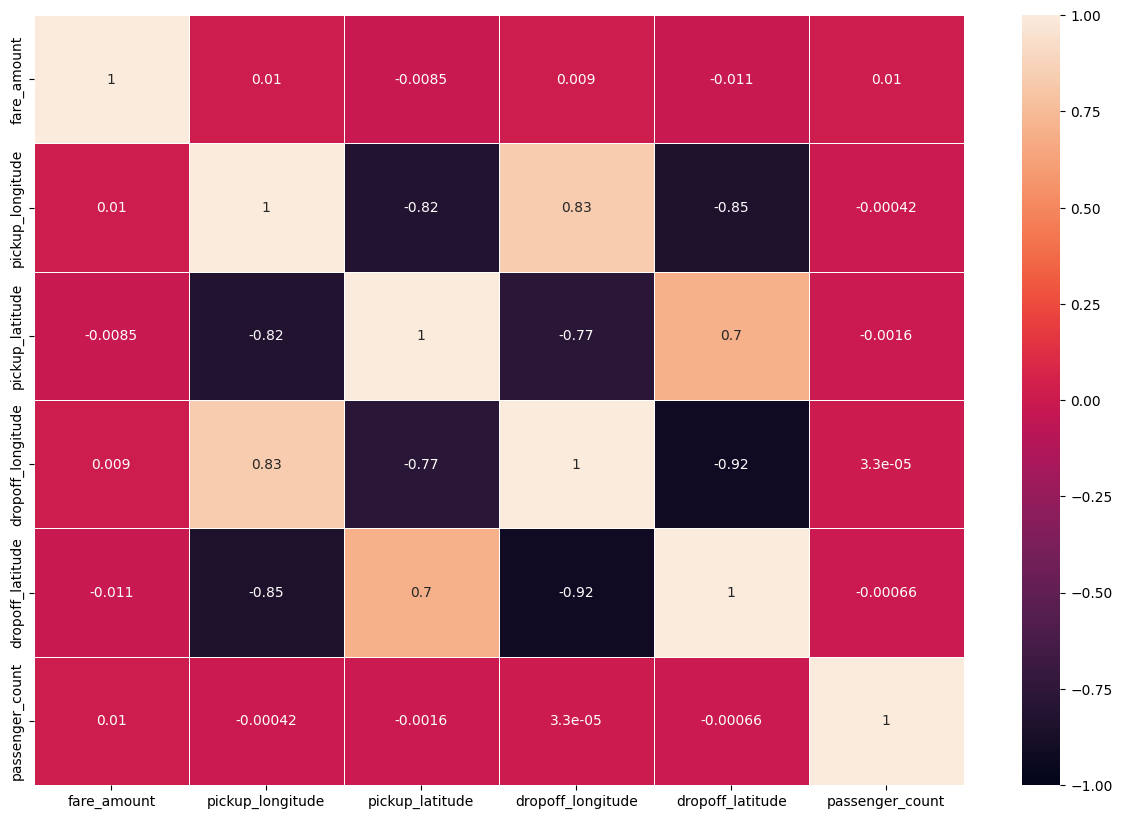

In [97]:
# Plot the Correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, vmin = -1, vmax = 1, fmt = '.2g')

In [98]:
from math import *

In [99]:
# Define formula to calculate haversine distance
def distance(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []

    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)

    return travel_dist

In [100]:
# Calculate Haversine distance for each row and add distance in km as a new column
data['distance_travelled'] = distance(data['pickup_longitude'].to_numpy(),
                                                data['pickup_latitude'].to_numpy(),
                                                data['dropoff_longitude'].to_numpy(),
                                                data['dropoff_latitude'].to_numpy()
                                              )

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         199999 non-null  float64
 1   pickup_datetime     199999 non-null  object 
 2   pickup_longitude    199999 non-null  float64
 3   pickup_latitude     199999 non-null  float64
 4   dropoff_longitude   199999 non-null  float64
 5   dropoff_latitude    199999 non-null  float64
 6   passenger_count     199999 non-null  int64  
 7   distance_travelled  199999 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 13.7+ MB


In [102]:
# As we can see, pickup_datetime is being read as an object data type. However, we need to convert it into datetime data type
data['pickup_datetime']  = pd.to_datetime(data['pickup_datetime'])

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   fare_amount         199999 non-null  float64            
 1   pickup_datetime     199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude    199999 non-null  float64            
 3   pickup_latitude     199999 non-null  float64            
 4   dropoff_longitude   199999 non-null  float64            
 5   dropoff_latitude    199999 non-null  float64            
 6   passenger_count     199999 non-null  int64              
 7   distance_travelled  199999 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 13.7 MB


Feature Engineering

In [104]:

# From pickup_datetime extract date, month, year, weekday and dayname
from datetime import datetime

data['date'] = pd.to_datetime(data['pickup_datetime']).dt.date
data['month'] = pd.to_datetime(data['pickup_datetime']).dt.month
data['year'] = pd.to_datetime(data['pickup_datetime']).dt.year
data['day_of_the_week'] = pd.to_datetime(data['pickup_datetime']).dt.weekday
data['day_name'] = pd.to_datetime(data['pickup_datetime']).dt.day_name()
data['pickup_time'] = pd.to_datetime(data['pickup_datetime']).dt.time
data['pickup_hour'] = pd.to_datetime(data['pickup_datetime']).dt.hour

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   fare_amount         199999 non-null  float64            
 1   pickup_datetime     199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude    199999 non-null  float64            
 3   pickup_latitude     199999 non-null  float64            
 4   dropoff_longitude   199999 non-null  float64            
 5   dropoff_latitude    199999 non-null  float64            
 6   passenger_count     199999 non-null  int64              
 7   distance_travelled  199999 non-null  float64            
 8   date                199999 non-null  object             
 9   month               199999 non-null  int64              
 10  year                199999 non-null  int64              
 11  day_of_the_week     199999 non-null  int64              
 12  day_name        

In [106]:
data.drop(data[data['passenger_count'] > 5].index, axis=0, inplace = True)
data.drop(data[data['passenger_count'] == 0].index, axis=0, inplace = True)
data.drop(data[data['fare_amount'] < 2.5].index, axis=0, inplace = True)
data.drop(data[data['distance_travelled'] > 130].index, axis=0, inplace = True)
data.drop(data[data['distance_travelled'] == 0].index, axis=0, inplace = True)
data.dropna(axis=0,inplace=True)

In [107]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_travelled,date,month,year,day_of_the_week,day_name,pickup_time,pickup_hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015-05-07,5,2015,3,Thursday,19:52:06,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009-07-17,7,2009,4,Friday,20:04:56,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009-08-24,8,2009,0,Monday,21:45:00,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009-06-26,6,2009,4,Friday,08:22:21,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014-08-28,8,2014,3,Thursday,17:47:00,17


In [108]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,189061.0,11.336739,9.730745,2.500000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,189061.0,-73.916225,2.560946,-75.419276,-73.992274,-73.982133,-73.968465,40.808425
pickup_latitude,189061.0,40.696089,2.634751,-74.015515,40.736440,40.753273,40.767532,401.066667
dropoff_longitude,189061.0,-73.915258,2.561027,-75.423067,-73.991594,-73.980564,-73.965513,40.831932
dropoff_latitude,189061.0,40.694481,2.501323,-74.015750,40.735345,40.753738,40.768327,45.031598
passenger_count,189061.0,1.595115,1.150926,1.000000,1.000000,1.000000,2.000000,5.000000
distance_travelled,189061.0,3.377859,3.984585,0.000084,1.279954,2.181325,3.938054,129.610094
month,189061.0,6.282337,3.439349,1.000000,3.000000,6.000000,9.000000,12.000000
year,189061.0,2011.719302,1.862527,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
day_of_the_week,189061.0,3.049095,1.946679,0.000000,1.000000,3.000000,5.000000,6.000000


In [109]:
# Dropping the columns 'pickup datetime' and 'pickup hour' as we have extracted relvant pieces of information
# from these columns and do not need these columns for our analysis now. Also, 'date' and 'day_name', month and yuear
# as well as pickup and dropoff coordinates are not required as we have the required data extracted from them

data = data.drop(['pickup_datetime','pickup_time', 'date', 'pickup_longitude', 'pickup_latitude',
                  'dropoff_longitude', 'dropoff_latitude', 'day_name'],axis=1)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189061 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         189061 non-null  float64
 1   passenger_count     189061 non-null  int64  
 2   distance_travelled  189061 non-null  float64
 3   month               189061 non-null  int64  
 4   year                189061 non-null  int64  
 5   day_of_the_week     189061 non-null  int64  
 6   pickup_hour         189061 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 11.5 MB


<Axes: xlabel='distance_travelled'>

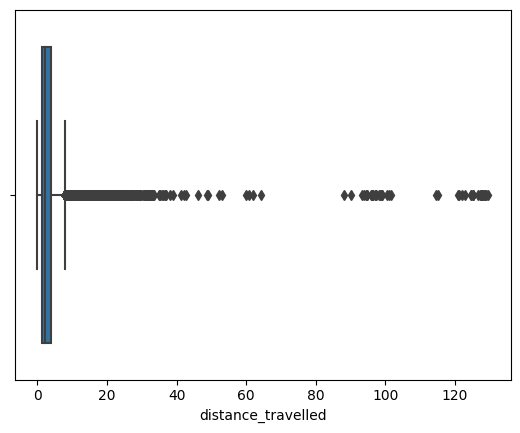

In [111]:
sns.boxplot(x=data['distance_travelled'])

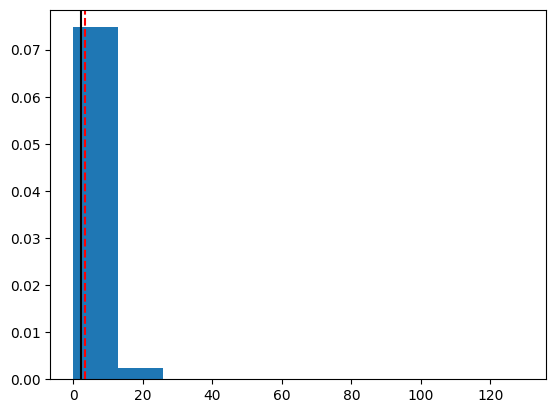

In [112]:
import matplotlib.pyplot as plt
hist = plt.hist(x=data['distance_travelled'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be ignored when calculating the mean)
plt.axvline(data['distance_travelled'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs will be ignored when calculating the median)
plt.axvline(data['distance_travelled'].median(), color = 'black', linestyle='-')

## Categorical Features - Univariate Analysis

Passenger Count

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '5'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

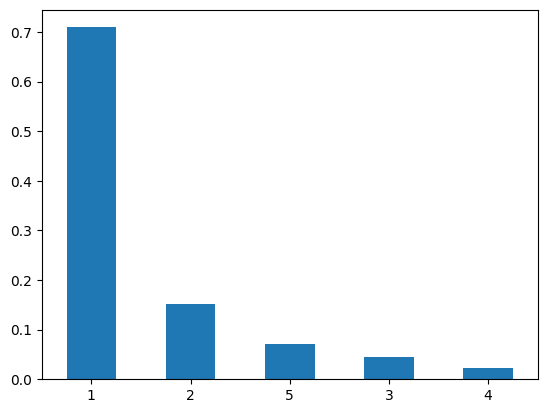

In [113]:
data['passenger_count'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Day of the week

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '4'),
  Text(1, 0, '5'),
  Text(2, 0, '3'),
  Text(3, 0, '2'),
  Text(4, 0, '1'),
  Text(5, 0, '6'),
  Text(6, 0, '0')])

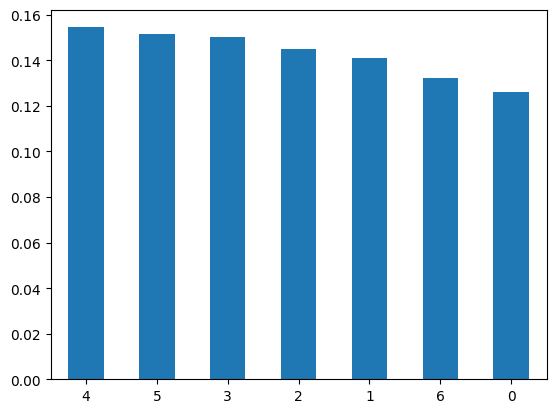

In [114]:
data['day_of_the_week'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Pickup Time

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '19'),
  Text(1, 0, '18'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '13'),
  Text(6, 0, '12'),
  Text(7, 0, '23'),
  Text(8, 0, '14'),
  Text(9, 0, '17'),
  Text(10, 0, '15'),
  Text(11, 0, '11'),
  Text(12, 0, '9'),
  Text(13, 0, '8'),
  Text(14, 0, '10'),
  Text(15, 0, '16'),
  Text(16, 0, '0'),
  Text(17, 0, '7'),
  Text(18, 0, '1'),
  Text(19, 0, '2'),
  Text(20, 0, '6'),
  Text(21, 0, '3'),
  Text(22, 0, '4'),
  Text(23, 0, '5')])

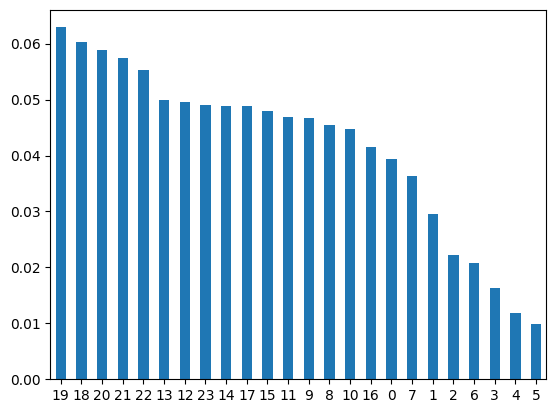

In [115]:
data['pickup_hour'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

## Bivariate/ Multivariate Analysis

In [116]:
!pip install geopandas
import geopandas as gpd

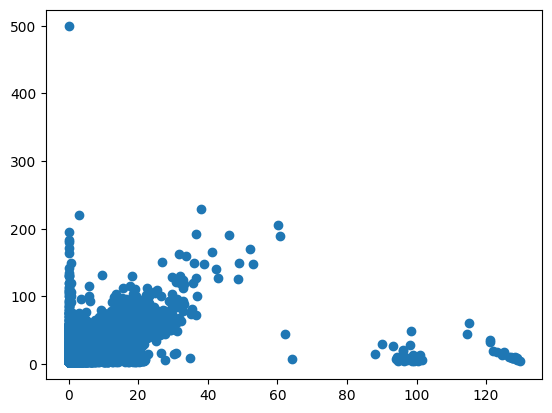

In [117]:
#Scatte plot of distance vs fare amount
plt.scatter(x = data.distance_travelled, y = data.fare_amount)

# Show the plot
plt.show()

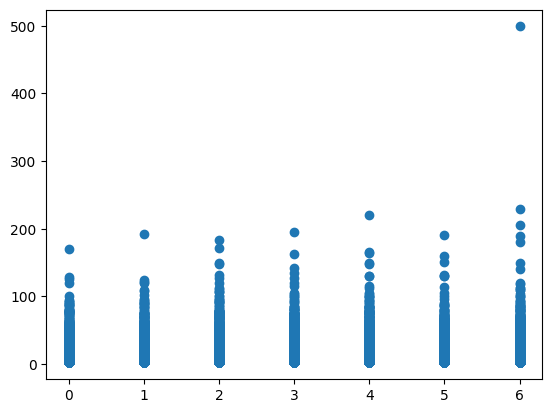

In [118]:
#Scatte plot of day of the week vs fare amount
plt.scatter(x = data.day_of_the_week, y = data.fare_amount)

# Show the plot
plt.show()

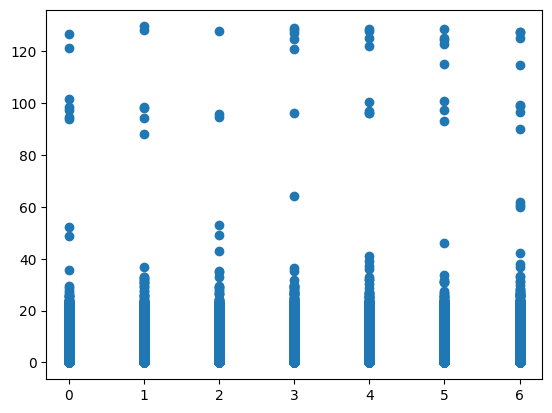

In [119]:
#Scatte plot of day of the week vs distance to see if there is any relationship between them
plt.scatter(x = data.day_of_the_week, y = data.distance_travelled)

# Show the plot
plt.show()

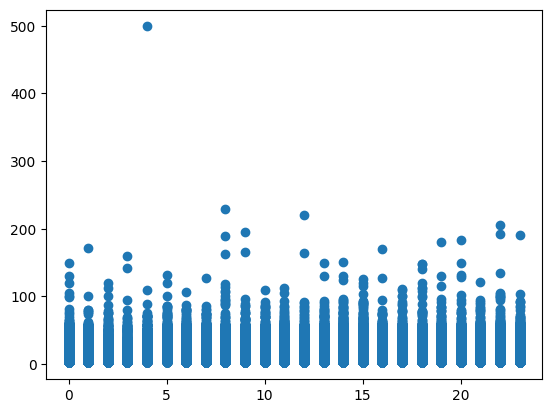

In [120]:
#Scatte plot of pickup time vs fare amount
plt.scatter(x = data.pickup_hour, y = data.fare_amount)

# Show the plot
plt.show()

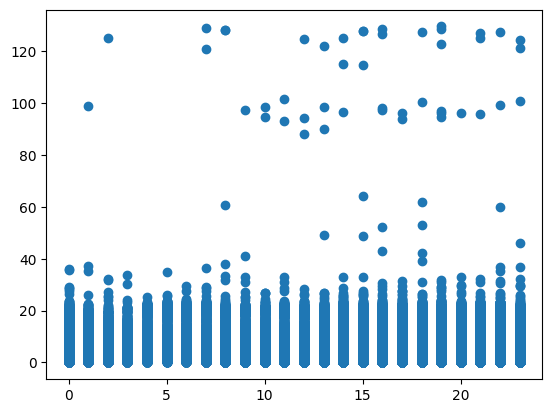

In [121]:
#Scatte plot of pickup time vs distance
plt.scatter(x = data.pickup_hour, y = data.distance_travelled)

# Show the plot
plt.show()

Data Preparation

Feature Scaling

In [122]:
#Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

In [123]:
x = data.drop(['fare_amount'], axis = 1)
y = data['fare_amount'].values.reshape(-1, 1)

In [124]:
y_std = std.fit_transform(y)

x_std = std.fit_transform(x)

In [125]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x_std, y_std, test_size = 0.3, random_state = 42)

In [126]:
x_train.shape

(132342, 6)

In [127]:
y_train.shape

(132342, 1)

In [128]:
x_test.shape

(56719, 6)

In [129]:
y_test.shape

(56719, 1)

## Regression Models

Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [131]:
LR_pred = LR.predict(x_test)

In [132]:
print("Training set score: {:.2f}".format(LR.score(x_train, y_train)))
print("Test set score: {:.7f}".format(LR.score(x_test, y_test)))

Training set score: 0.65
Test set score: 0.5782372


In [133]:
from sklearn import metrics
from sklearn.metrics import r2_score

MAE_LR= metrics.mean_absolute_error(y_test, LR_pred)
MSE_LR= metrics.mean_squared_error(y_test, LR_pred)
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test, LR_pred))
r2_LR=r2_score(y_test, LR_pred)
Adj_r2_LR=1-(1-r2_score(y_test, LR_pred))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [134]:
print('Mean absolute error of linear regression',MAE_LR)
print('Mean square  error of linear regression',MSE_LR)
print('root Mean square error of linear regression',RMSE_LR)
print('r2 score of linear regression',r2_LR)
print('adjusted r2 of linear regression',Adj_r2_LR)

Mean absolute error of linear regression 0.2573904473859176
Mean square  error of linear regression 0.4147342387915015
root Mean square error of linear regression 0.6439986326006457
r2 score of linear regression 0.5782372370795461
adjusted r2 of linear regression 0.5781926155430543


Decision Tree Regressor

In [135]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [136]:
DTpreds = DT.predict(x_test)

In [137]:
print("Training set score: {:.2f}".format(DT.score(x_train, y_train)))
print("Test set score: {:.7f}".format(DT.score(x_test, y_test)))

Training set score: 1.00
Test set score: 0.5630113


In [138]:
MAE_DT= metrics.mean_absolute_error(y_test, DTpreds)
MSE_DT= metrics.mean_squared_error(y_test, DTpreds)
RMSE_DT= np.sqrt(metrics.mean_squared_error(y_test, DTpreds))
r2_DT=r2_score(y_test, DTpreds)
Adj_r2_DT=1-(1-r2_score(y_test, DTpreds))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [139]:
print('Mean absolute error of decision tree',MAE_DT)
print('Mean square  error of decision tree',MSE_DT)
print('root Mean square error of decision tree',RMSE_DT)
print('r2 score of decision tree',r2_DT)
print('adjusted r2 of decision tree',Adj_r2_DT)

Mean absolute error of decision tree 0.3054080485026727
Mean square  error of decision tree 0.4297064090807789
root Mean square error of decision tree 0.6555199532285642
r2 score of decision tree 0.5630113325906339
adjusted r2 of decision tree 0.5629651001882419


Random Forest Regressor

In [140]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(x_train, y_train.ravel())

RandomForestRegressor()

In [141]:
RFpreds = RF.predict(x_test)

In [142]:
print("Training set score: {:.2f}".format(RF.score(x_train, y_train)))
print("Test set score: {:.7f}".format(RF.score(x_test, y_test)))

Training set score: 0.97
Test set score: 0.7900429


In [143]:
MAE_RF= metrics.mean_absolute_error(y_test, RFpreds)
MSE_RF= metrics.mean_squared_error(y_test, RFpreds)
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test, RFpreds))
r2_RF=r2_score(y_test, RFpreds)
Adj_r2_RF=1-(1-r2_score(y_test, RFpreds))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [144]:
print('Mean absolute error of random forest',MAE_RF)
print('Mean square  error of random forest',MSE_RF)
print('root Mean square error of random forest',RMSE_RF)
print('r2 score of random forest',r2_RF)
print('adjusted r2 of random forest',Adj_r2_RF)

Mean absolute error of random forest 0.2251793329615889
Mean square  error of random forest 0.2064582332017959
root Mean square error of random forest 0.45437675248828024
r2 score of random forest 0.7900429076784264
adjusted r2 of random forest 0.7900206946978592


## Boosting

In [145]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

Gradient Boosting

In [146]:
gbr = GradientBoostingRegressor(random_state = 42)
gbr.fit(x_train, y_train.ravel())
predictions_gbr = gbr.predict(x_test)

In [147]:
print("Training set score: {:.2f}".format(gbr.score(x_train, y_train)))
print("Test set score: {:.7f}".format(gbr.score(x_test, y_test)))

Training set score: 0.82
Test set score: 0.7828862


In [148]:
MAE_GBR= metrics.mean_absolute_error(y_test, predictions_gbr)
MSE_GBR= metrics.mean_squared_error(y_test, predictions_gbr)
RMSE_GBR= np.sqrt(metrics.mean_squared_error(y_test, predictions_gbr))
r2_GBR=r2_score(y_test, predictions_gbr)
Adj_r2_GBR=1-(1-r2_score(y_test, predictions_gbr))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [149]:
print('Mean absolute error of gradient boosting regressor',MAE_GBR)
print('Mean square  error of gradient boosting regressor',MSE_GBR)
print('root Mean square error of gradient boosting regressor',RMSE_GBR)
print('r2 score of gradient boosting regressor',r2_GBR)
print('adjusted r2 of gradient boosting regressor',Adj_r2_GBR)

Mean absolute error of gradient boosting regressor 0.2119350848285695
Mean square  error of gradient boosting regressor 0.2134956752780714
root Mean square error of gradient boosting regressor 0.46205592224109776
r2 score of gradient boosting regressor 0.7828862016812764
adjusted r2 of gradient boosting regressor 0.7828632315375694


XGBoost Classifier

In [150]:
!pip install xgboost
from xgboost import XGBRegressor

In [151]:
xgb = XGBRegressor(random_state = 42, scale_pos_weight = 1)
xgb.fit(x_train, y_train)
predictions_xgb = xgb.predict(x_test)

In [152]:
print("Training set score: {:.2f}".format(xgb.score(x_train, y_train)))
print("Test set score: {:.7f}".format(xgb.score(x_test, y_test)))

Training set score: 0.86
Test set score: 0.7843994


In [153]:
MAE_XGB= metrics.mean_absolute_error(y_test, predictions_xgb)
MSE_XGB= metrics.mean_squared_error(y_test, predictions_xgb)
RMSE_XGB= np.sqrt(metrics.mean_squared_error(y_test, predictions_xgb))
r2_XGB=r2_score(y_test, predictions_xgb)
Adj_r2_XGB=1-(1-r2_score(y_test, predictions_xgb))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [154]:
print('Mean absolute error of XGB regressor',MAE_XGB)
print('Mean square  error of XGB regressor',MSE_XGB)
print('root Mean square error of XGB regressor',RMSE_XGB)
print('r2 score of XGB regressor',r2_XGB)
print('adjusted r2 of XGB regressor',Adj_r2_XGB)

Mean absolute error of XGB regressor 0.2147967789338252
Mean square  error of XGB regressor 0.21200769132445246
root Mean square error of XGB regressor 0.46044292949773097
r2 score of XGB regressor 0.7843994025814198
adjusted r2 of XGB regressor 0.7843765925309101


## Choosing the Best Models

In [155]:
cols = ['Model', 'MSE', 'RMSE', 'R2_score','MAE','ADJ_r']

# create a empty dataframe of the colums
result_table = pd.DataFrame(columns = cols)

In [156]:
full_metrics = pd.Series({'Model': "Linear Regression", 'MSE': MSE_LR, 'RMSE' : RMSE_LR, 'R2_score' : r2_LR,'MAE':MAE_LR,'ADJ_r':Adj_r2_LR})

In [157]:
import pandas as pd

result_table = pd.concat([result_table, full_metrics], ignore_index=True)


In [158]:
full_metrics = pd.Series({'Model': "Decision Tree", 'MSE': MSE_DT, 'RMSE' : RMSE_DT, 'R2_score' : r2_DT,'MAE':MAE_DT,'ADJ_r':Adj_r2_DT})

In [159]:
result_table = pd.concat([result_table, full_metrics], ignore_index=True)

In [160]:
full_metrics = pd.Series({'Model': "Random Forest", 'MSE': MSE_RF, 'RMSE' : RMSE_RF, 'R2_score' : r2_RF,'MAE':MAE_RF,'ADJ_r':Adj_r2_RF})

In [161]:
result_table = pd.concat([result_table, full_metrics], ignore_index=True)

In [162]:
full_metrics = pd.Series({'Model': "Gardient Boosting", 'MSE': MSE_GBR, 'RMSE' : RMSE_GBR, 'R2_score' : r2_GBR,'MAE':MAE_GBR,'ADJ_r':Adj_r2_GBR})

In [163]:
result_table = pd.concat([result_table, full_metrics], ignore_index=True)

In [164]:
full_metrics = pd.Series({'Model': "XGBoost", 'MSE': MSE_XGB, 'RMSE' : RMSE_XGB, 'R2_score' : r2_XGB,'MAE':MAE_XGB,'ADJ_r':Adj_r2_XGB})

In [165]:
result_table = pd.concat([result_table, full_metrics], ignore_index=True)

In [166]:
# # # result_table
# # # from IPython.display import display

# # # # Display your DataFrame
# # # display(result_table)
# # import pandas as pd

# # # Enable the option to display DataFrames as HTML tables
# # pd.set_option("display.notebook_repr_html", True)

# # # Display your DataFrame
# # print(result_table)
# # Ensure both DataFrames have the same columns
# assert set(result_table.columns) == set(full_metrics.columns), "DataFrames have mismatched columns"

# # Append full_metrics DataFrame to result_table DataFrame
# result_table = result_table.append(full_metrics, ignore_index=True)

# # Display the result_table DataFrame
# display(result_table)
result_table

,Model,MSE,RMSE,R2_score,MAE,ADJ_r,0
0,NaN,NaN,NaN,NaN,NaN,NaN,Linear Regression
1,NaN,NaN,NaN,NaN,NaN,NaN,0.414734
2,NaN,NaN,NaN,NaN,NaN,NaN,0.643999
3,NaN,NaN,NaN,NaN,NaN,NaN,0.578237
4,NaN,NaN,NaN,NaN,NaN,NaN,0.25739
5,NaN,NaN,NaN,NaN,NaN,NaN,0.578193
6,NaN,NaN,NaN,NaN,NaN,NaN,Decision Tree
7,NaN,NaN,NaN,NaN,NaN,NaN,0.429706
8,NaN,NaN,NaN,NaN,NaN,NaN,0.65552
9,NaN,NaN,NaN,NaN,NaN,NaN,0.563011


Based on the above, Random Forest produces the best results out of all tested models. However, hyperparameter tuning could help improve the results